# Load Packages

In [1]:
import pandas as pd

pd.options.display.float_format = '{:,.4f}'.format

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, explained_variance_score

from srcs.utils import load_data, print_scores, get_scores, calculate_metrics
import time
import tracemalloc
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings

warnings.filterwarnings('ignore')

# use to store the scores of each model
results = []

hyperparameters = {}

# Statistical Model


In [2]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)
# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Zero")
# Noting to specify, as it is an intercept only model
# End of model specification

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    # Noting to specify, as it is an intercept only model,no need to train
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = 0 * np.ones_like(y_train)
    y_pred_test = 0 * np.ones_like(y_test)

    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

PDE and Mean Poisson Deviance are not well calculated because of the negative values in the prediction
PDE and Mean Poisson Deviance are not well calculated because of the negative values in the prediction
PDE and Mean Poisson Deviance are not well calculated because of the negative values in the prediction
PDE and Mean Poisson Deviance are not well calculated because of the negative values in the prediction
PDE and Mean Poisson Deviance are not well calculated because of the negative values in the prediction


,Model,Type,Metric,Mean,Std
1,Zero,test,MAE,0.0515,0.0008
5,Zero,test,MaxError,3.0000,0.6325
7,Zero,test,MeanPoissonDeviance,1.3280,0.0215
9,Zero,test,PDE,-3.2368,0.0181
11,Zero,test,R2,-0.0484,0.0008
3,Zero,test,RMSE,0.2397,0.0037
15,Zero,test,memory,0.0008,0.0000
13,Zero,test,time,0.0000,0.0000
0,Zero,train,MAE,0.0515,0.0002
4,Zero,train,MaxError,3.8000,0.4000


In [3]:
np.abs((y_train-y_test.mean())).mean()

0.09851990317004865


### Intercept Only Model

In [4]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)
# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="INT")
# Noting to specify, as it is an intercept only model
# End of model specification

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    # Noting to specify, as it is an intercept only model,no need to train
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = y_train.mean() * np.ones_like(y_train)
    y_pred_test = y_test.mean() * np.ones_like(y_test)

    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,INT,test,MAE,0.0980,0.0015
5,INT,test,MaxError,2.9485,0.6323
7,INT,test,MeanPoissonDeviance,0.3134,0.0043
9,INT,test,PDE,0.0000,0.0000
11,INT,test,R2,0.0000,0.0000
3,INT,test,RMSE,0.2341,0.0036
15,INT,test,memory,0.0009,0.0000
13,INT,test,time,0.0002,0.0004
0,INT,train,MAE,0.0980,0.0004
4,INT,train,MaxError,3.7485,0.3999


## Naive Poisson Regression -- Baseline

In [5]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)
# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="GLM-N")
from sklearn.linear_model import PoissonRegressor

naive_poisson = PoissonRegressor()
# End of model specification

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson.fit(X_train, y_train, sample_weight=X_train["Exposure"])
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

  File "D:\workspace\GraduateGrade2Term2LSEWT\PGPC2024\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,Model,Type,Metric,Mean,Std
1,GLM-N,test,MAE,0.1077,0.0005
5,GLM-N,test,MaxError,2.9378,0.6326
7,GLM-N,test,MeanPoissonDeviance,0.3154,0.0039
9,GLM-N,test,PDE,-0.0064,0.0015
11,GLM-N,test,R2,-0.0021,0.0005
3,GLM-N,test,RMSE,0.2343,0.0036
15,GLM-N,test,memory,0.0388,0.0000
13,GLM-N,test,time,0.0256,0.0017
0,GLM-N,train,MAE,0.1077,0.0005
4,GLM-N,train,MaxError,3.7378,0.3999


## Naive Poisson Regression -- With Feature Engineering + Hyperparameter Tuning

In [6]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3

df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="GLM-N-FH")
from sklearn.linear_model import PoissonRegressor

import optuna


def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 1e-5, 1e5),
        'solver': trial.suggest_categorical('solver', ["lbfgs", "newton-cholesky"]),
    }
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = PoissonRegressor(**param)
    model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    y_pred = model.predict(X_test)
    from sklearn.metrics import mean_poisson_deviance
    score = mean_poisson_deviance(y_test, y_pred)
    return score


study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42))

study.optimize(objective, n_trials=100, n_jobs=-1)

naive_poisson2 = PoissonRegressor(**study.best_params)

# End of model specification


kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson2.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

[I 2024-02-26 21:44:24,975] A new study created in memory with name: no-name-4bc70948-59c6-46f2-981d-27f1db1924d1
[I 2024-02-26 21:44:25,441] Trial 13 finished with value: 0.31834821060412427 and parameters: {'alpha': 77590.03790918298, 'solver': 'lbfgs'}. Best is trial 13 with value: 0.31834821060412427.
[I 2024-02-26 21:44:25,460] Trial 3 finished with value: 0.31834821060412427 and parameters: {'alpha': 41681.52969976433, 'solver': 'lbfgs'}. Best is trial 13 with value: 0.31834821060412427.
[I 2024-02-26 21:44:25,680] Trial 8 finished with value: 0.31834821060412427 and parameters: {'alpha': 35444.97302594358, 'solver': 'lbfgs'}. Best is trial 13 with value: 0.31834821060412427.
[I 2024-02-26 21:44:25,844] Trial 5 finished with value: 0.31834821060412427 and parameters: {'alpha': 89901.52816636732, 'solver': 'lbfgs'}. Best is trial 13 with value: 0.31834821060412427.
[I 2024-02-26 21:44:25,937] Trial 7 finished with value: 0.31834821060412427 and parameters: {'alpha': 40898.99465314

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,GLM-N-FH,test,MAE,0.1078,0.0005
5,GLM-N-FH,test,MaxError,2.9419,0.6280
7,GLM-N-FH,test,MeanPoissonDeviance,0.3149,0.0040
9,GLM-N-FH,test,PDE,-0.0048,0.0013
11,GLM-N-FH,test,R2,-0.0017,0.0004
3,GLM-N-FH,test,RMSE,0.2343,0.0036
15,GLM-N-FH,test,memory,0.0428,0.0000
13,GLM-N-FH,test,time,0.0521,0.0387
0,GLM-N-FH,train,MAE,0.1078,0.0005
4,GLM-N-FH,train,MaxError,3.7388,0.3976


## zero-inflated Poisson Regression

In [7]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2

df["DrivAge2"] = df["DrivAge"] ** 2

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="GLM-Z")

from statsmodels.discrete.count_model import ZeroInflatedPoisson

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = zero_inflated_poisson = ZeroInflatedPoisson(endog=y_train,
                                                        exog=X_train.astype(float),
                                                        exog_infl=X_train.astype(float),
                                                        exposure=X_train["Exposure"]).fit_regularized()
    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train.astype(float),
                                 exog_infl=X_train.astype(float),
                                 exposure=X_train["Exposure"])
    y_pred_test = model.predict(X_test.astype(float),
                                exog_infl=X_test.astype(float),
                                exposure=X_test["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)

results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1992272568476434
            Iterations: 86
            Function evaluations: 157
            Gradient evaluations: 86
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20116052214080302
            Iterations: 44
            Function evaluations: 125
            Gradient evaluations: 44
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19993822003171902
            Iterations: 39
            Function evaluations: 119
            Gradient evaluations: 39
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20107709146227806
            Iterations: 66
            Function evaluations: 146
            Gradient evaluations: 66
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19939757288294813
            Iterations: 46
            Func

,Model,Type,Metric,Mean,Std
1,GLM-Z,test,MAE,0.0965,0.0005
5,GLM-Z,test,MaxError,2.9539,0.6035
7,GLM-Z,test,MeanPoissonDeviance,0.3030,0.0058
9,GLM-Z,test,PDE,0.0335,0.0089
11,GLM-Z,test,R2,0.0128,0.0039
3,GLM-Z,test,RMSE,0.2326,0.0037
15,GLM-Z,test,memory,0.0857,0.0000
13,GLM-Z,test,time,0.0432,0.0039
0,GLM-Z,train,MAE,0.0964,0.0004
4,GLM-Z,train,MaxError,3.7140,0.3709


## Hurdle Poisson Regression

In [8]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2

df["DrivAge2"] = df["DrivAge"] ** 2

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="GLM-H")

from statsmodels.discrete.truncated_model import HurdleCountModel

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = HurdleCountModel(endog=y_train.astype(float),
                             exog=X_train.astype(float),
                             dist='poisson',
                             zerodist='poisson',
                             ).fit(disp=False)
    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train.astype(float))
    y_pred_test = model.predict(X_test.astype(float))

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)

results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

D:\workspace\GraduateGrade2Term2LSEWT\PGPC2024\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\workspace\GraduateGrade2Term2LSEWT\PGPC2024\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\workspace\GraduateGrade2Term2LSEWT\PGPC2024\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\workspace\GraduateGrade2Term2LSEWT\PGPC2024\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

,Model,Type,Metric,Mean,Std
1,GLM-H,test,MAE,0.1230,0.0004
5,GLM-H,test,MaxError,2.9290,0.5946
7,GLM-H,test,MeanPoissonDeviance,0.3162,0.0043
9,GLM-H,test,PDE,-0.0088,0.0085
11,GLM-H,test,R2,-0.0161,0.0060
3,GLM-H,test,RMSE,0.2360,0.0036
15,GLM-H,test,memory,0.0445,0.0000
13,GLM-H,test,time,0.0180,0.0009
0,GLM-H,train,MAE,0.1229,0.0005
4,GLM-H,train,MaxError,3.6730,0.3619


# Machine Learning Model
## XGBoost Poisson Regression

In [9]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6

df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)

# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="XGB")
from xgboost import XGBRegressor

xgboost_poisson_model = XGBRegressor(objective="count:poisson")

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = xgboost_poisson_model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,XGB,test,MAE,0.0939,0.0003
5,XGB,test,MaxError,2.9513,0.6199
7,XGB,test,MeanPoissonDeviance,0.2956,0.0044
9,XGB,test,PDE,0.0570,0.0076
11,XGB,test,R2,0.0205,0.0026
3,XGB,test,RMSE,0.2317,0.0033
15,XGB,test,memory,0.0540,0.0000
13,XGB,test,time,0.7932,0.0076
0,XGB,train,MAE,0.0871,0.0005
4,XGB,train,MaxError,3.5343,0.2996


## XGBoost Regression -- Hyperparameter Tuning

In [10]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6

df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)

# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="XGB")
from xgboost import XGBRegressor

xgboost_poisson_model = XGBRegressor(objective="count:poisson")

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = xgboost_poisson_model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
hyperparameters["XGB"] = study.best_params
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,XGB,test,MAE,0.0939,0.0003
5,XGB,test,MaxError,2.9513,0.6199
7,XGB,test,MeanPoissonDeviance,0.2956,0.0044
9,XGB,test,PDE,0.0570,0.0076
11,XGB,test,R2,0.0205,0.0026
3,XGB,test,RMSE,0.2317,0.0033
15,XGB,test,memory,0.0540,0.0000
13,XGB,test,time,0.7918,0.0140
0,XGB,train,MAE,0.0871,0.0005
4,XGB,train,MaxError,3.5343,0.2996


In [11]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6

df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)

# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="XGB-H")

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

import optuna


def objective(trial):
    param = {
        'objective': trial.suggest_categorical('objective', ['count:poisson', "reg:tweedie"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
    }
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = XGBRegressor(**param)
    model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    y_pred = model.predict(X_test)
    from sklearn.metrics import mean_poisson_deviance
    score = mean_poisson_deviance(y_test, y_pred)
    return score


study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100, n_jobs=-1)

xgboost_poisson_model = XGBRegressor(**study.best_params)

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = xgboost_poisson_model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

[I 2024-02-26 21:47:48,862] A new study created in memory with name: no-name-b73895ad-96b0-4502-9b1f-c5f26ff814c5
[I 2024-02-26 21:47:54,533] Trial 7 finished with value: 0.2969230405828778 and parameters: {'objective': 'reg:tweedie', 'n_estimators': 101, 'learning_rate': 0.07666949414512937, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.8092751021230236, 'colsample_bytree': 0.6336440749680982, 'reg_alpha': 0.11936017185735659, 'reg_lambda': 0.017551708837032498, 'gamma': 0.7927251261401786}. Best is trial 7 with value: 0.2969230405828778.
[I 2024-02-26 21:47:55,175] Trial 15 finished with value: 0.2984598039412756 and parameters: {'objective': 'count:poisson', 'n_estimators': 162, 'learning_rate': 0.10638990525189393, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5951531624814536, 'colsample_bytree': 0.7034888927428176, 'reg_alpha': 0.2776825679181779, 'reg_lambda': 0.7551341453867674, 'gamma': 0.006849294732071853}. Best is trial 7 with value: 0.2969230405828778.
[I 2

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,XGB-H,test,MAE,0.0961,0.0005
5,XGB-H,test,MaxError,2.9477,0.6137
7,XGB-H,test,MeanPoissonDeviance,0.2906,0.0041
9,XGB-H,test,PDE,0.0727,0.0056
11,XGB-H,test,R2,0.0308,0.0020
3,XGB-H,test,RMSE,0.2305,0.0034
15,XGB-H,test,memory,0.0540,0.0000
13,XGB-H,test,time,0.8289,0.0132
0,XGB-H,train,MAE,0.0947,0.0003
4,XGB-H,train,MaxError,3.7288,0.3825


## LightBoost Poisson Regression

In [12]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6

df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="LGB")

from lightgbm import LGBMRegressor

lightboost_poisson_model = LGBMRegressor(objective="poisson")

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = lightboost_poisson_model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 54240, number of used features: 59
[LightGBM] [Info] Start training from score -2.774594
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 54241, number of used features: 59
[LightGBM] [Info] Start training from score -2.765472
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

,Model,Type,Metric,Mean,Std
1,LGB,test,MAE,0.0957,0.0004
5,LGB,test,MaxError,2.9495,0.6182
7,LGB,test,MeanPoissonDeviance,0.2926,0.0046
9,LGB,test,PDE,0.0666,0.0058
11,LGB,test,R2,0.0271,0.0019
3,LGB,test,RMSE,0.2309,0.0035
15,LGB,test,memory,0.0481,0.0000
13,LGB,test,time,0.0680,0.0097
0,LGB,train,MAE,0.0923,0.0004
4,LGB,train,MaxError,3.7177,0.3775


## LightBoost Poisson Regression -- Hyperparameter Tuning

In [13]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6

df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="LGB-H")

from lightgbm import LGBMRegressor
import optuna


def objective(trial):
    param = {
        "objective": trial.suggest_categorical("objective", ["poisson", "tweedie"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LGBMRegressor(**param)
    model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    y_pred = model.predict(X_test)
    from sklearn.metrics import mean_poisson_deviance
    score = mean_poisson_deviance(y_test, y_pred)
    return score


study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100, n_jobs=-1)

lightboost_poisson_model = LGBMRegressor(silent=True, **study.best_params)

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = lightboost_poisson_model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
hyperparameters["LGB"] = study.best_params
print_scores(scores)

[I 2024-02-26 21:49:27,132] A new study created in memory with name: no-name-06c31105-3c12-4721-9203-2c6c8d996382
[I 2024-02-26 21:49:29,400] Trial 10 finished with value: 0.2989252007648753 and parameters: {'objective': 'tweedie', 'n_estimators': 147, 'learning_rate': 0.30745797825826443, 'max_depth': 2, 'reg_alpha': 0.20428343575803265, 'reg_lambda': 0.6149262018359368}. Best is trial 10 with value: 0.2989252007648753.
[I 2024-02-26 21:49:29,954] Trial 0 finished with value: 0.2990535124040635 and parameters: {'objective': 'poisson', 'n_estimators': 298, 'learning_rate': 0.03912419037385754, 'max_depth': 2, 'reg_alpha': 0.8960120091463705, 'reg_lambda': 0.6056567270512023}. Best is trial 10 with value: 0.2989252007648753.
[I 2024-02-26 21:49:30,542] Trial 16 finished with value: 0.31415968600567085 and parameters: {'objective': 'tweedie', 'n_estimators': 232, 'learning_rate': 0.4101707415172727, 'max_depth': 3, 'reg_alpha': 0.3017882184342092, 'reg_lambda': 0.5130212774649437}. Best 

0it [00:00, ?it/s]

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 54240, number of used features: 59
[LightGBM] [Info] Start training from score -2.774594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

,Model,Type,Metric,Mean,Std
1,LGB-H,test,MAE,0.0965,0.0005
5,LGB-H,test,MaxError,2.9484,0.6124
7,LGB-H,test,MeanPoissonDeviance,0.2910,0.0038
9,LGB-H,test,PDE,0.0716,0.0054
11,LGB-H,test,R2,0.0301,0.0022
3,LGB-H,test,RMSE,0.2305,0.0033
15,LGB-H,test,memory,0.0481,0.0000
13,LGB-H,test,time,0.0790,0.0120
0,LGB-H,train,MAE,0.0953,0.0003
4,LGB-H,train,MaxError,3.7293,0.3831


## CatBoost Poisson Regression

In [14]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6

df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="CGB-N")

from catboost import CatBoostRegressor

catboost_poisson_model = CatBoostRegressor(loss_function="Poisson")

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = catboost_poisson_model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

0:	learn: 0.9238315	total: 180ms	remaining: 2m 59s
1:	learn: 0.8564954	total: 200ms	remaining: 1m 40s
2:	learn: 0.7975278	total: 217ms	remaining: 1m 12s
3:	learn: 0.7446885	total: 235ms	remaining: 58.4s
4:	learn: 0.6973951	total: 250ms	remaining: 49.8s
5:	learn: 0.6548931	total: 267ms	remaining: 44.3s
6:	learn: 0.6168948	total: 284ms	remaining: 40.3s
7:	learn: 0.5827130	total: 301ms	remaining: 37.3s
8:	learn: 0.5522995	total: 318ms	remaining: 35s
9:	learn: 0.5245250	total: 334ms	remaining: 33.1s
10:	learn: 0.4995898	total: 352ms	remaining: 31.6s
11:	learn: 0.4770029	total: 369ms	remaining: 30.4s
12:	learn: 0.4564500	total: 386ms	remaining: 29.3s
13:	learn: 0.4380304	total: 404ms	remaining: 28.5s
14:	learn: 0.4206024	total: 422ms	remaining: 27.7s
15:	learn: 0.4054818	total: 443ms	remaining: 27.2s
16:	learn: 0.3913623	total: 462ms	remaining: 26.7s
17:	learn: 0.3787996	total: 478ms	remaining: 26.1s
18:	learn: 0.3673587	total: 497ms	remaining: 25.6s
19:	learn: 0.3564712	total: 514ms	remain

,Model,Type,Metric,Mean,Std
1,CGB-N,test,MAE,0.0940,0.0005
5,CGB-N,test,MaxError,2.9465,0.6107
7,CGB-N,test,MeanPoissonDeviance,0.2933,0.0044
9,CGB-N,test,PDE,0.0644,0.0049
11,CGB-N,test,R2,0.0257,0.0017
3,CGB-N,test,RMSE,0.2311,0.0037
15,CGB-N,test,memory,0.0038,0.0000
13,CGB-N,test,time,4.8856,0.0498
0,CGB-N,train,MAE,0.0895,0.0003
4,CGB-N,train,MaxError,3.6866,0.3619


## AutoML

In [15]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6

df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="AutoML")
from autogluon.tabular import TabularPredictor

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    predictor = TabularPredictor(label='ClaimNb',
                                 problem_type="regression",
                                 eval_metric="r2",
                                 sample_weight="Exposure").fit(train_data, time_limit=180, presets='best_quality')

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_test = predictor.predict(test_data)
    y_pred_train = predictor.predict(train_data)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)


0it [00:00, ?it/s]

No path specified. Models will be saved in: "AutogluonModels\ag-20240226_215226"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 180 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels\ag-20240226_215226/ds_sub_fit/sub_fit_ho.
Values in column 'Exposure' used as sample weights instead of predictive features. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluo

,Model,Type,Metric,Mean,Std
1,AutoML,test,MAE,0.0981,0.0005
5,AutoML,test,MaxError,2.9428,0.6154
7,AutoML,test,MeanPoissonDeviance,0.3034,0.0045
9,AutoML,test,PDE,0.0320,0.0046
11,AutoML,test,R2,0.0140,0.0014
3,AutoML,test,RMSE,0.2324,0.0035
15,AutoML,test,memory,0.3251,0.0472
13,AutoML,test,time,15.7934,2.1139
0,AutoML,train,MAE,0.0954,0.0007
4,AutoML,train,MaxError,3.6574,0.3784


## Combined actuarial neural network

In [16]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3

df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3

# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="CANN")

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping


def create_model(input_shape):
    """
    Create a neural network model for regression on preprocessed data,
    with Dropout and L2 regularization to reduce overfitting.
    """
    # Input layer
    inputs = layers.Input(shape=(input_shape,))

    # Neural network layers with Dropout and L2 regularization
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.Dropout(0.5)(x)  # Dropout layer
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.5)(x)  # Another Dropout layer
    output = layers.Dense(1)(x)  # Output layer for regression

    # Create model
    model = models.Model(inputs=inputs, outputs=output)

    # Compile model
    model.compile(optimizer="adam", loss="mse")

    return model


# Adding EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

model = create_model(X.shape[1])

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # MinMaxScaler the X_train and X_test
    from sklearn.preprocessing import MinMaxScaler

    X_train = MinMaxScaler().fit_transform(X_train)
    X_test = MinMaxScaler().fit_transform(X_test)

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=100,
              batch_size=32,
              callbacks=[early_stopping])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

Epoch 1/100
1695/1695 [==============================] - 4s 2ms/step - loss: 0.0928 - val_loss: 0.0585
Epoch 2/100
1695/1695 [==============================] - 3s 2ms/step - loss: 0.0551 - val_loss: 0.0560
Epoch 3/100
1695/1695 [==============================] - 3s 2ms/step - loss: 0.0546 - val_loss: 0.0560
Epoch 4/100
1695/1695 [==============================] - 3s 2ms/step - loss: 0.0546 - val_loss: 0.0561
Epoch 5/100
1695/1695 [==============================] - 3s 2ms/step - loss: 0.0545 - val_loss: 0.0560
Epoch 6/100
1695/1695 [==============================] - 3s 2ms/step - loss: 0.0545 - val_loss: 0.0560
Epoch 7/100
1695/1695 [==============================] - 3s 2ms/step - loss: 0.0545 - val_loss: 0.0561
Epoch 8/100
1695/1695 [==============================] - 3s 2ms/step - loss: 0.0545 - val_loss: 0.0562
Epoch 9/100
1695/1695 [==============================] - 3s 2ms/step - loss: 0.0545 - val_loss: 0.0560
Epoch 10/100
1695/1695 [==============================] - 3s 2ms/step - l

,Model,Type,Metric,Mean,Std
1,CANN,test,MAE,0.0980,0.0030
5,CANN,test,MaxError,2.9498,0.6278
7,CANN,test,MeanPoissonDeviance,0.3083,0.0041
9,CANN,test,PDE,0.0163,0.0020
11,CANN,test,R2,0.0054,0.0008
3,CANN,test,RMSE,0.2335,0.0036
15,CANN,test,memory,0.0351,0.0002
13,CANN,test,time,4.9040,2.4076
0,CANN,train,MAE,0.0978,0.0031
4,CANN,train,MaxError,3.7497,0.3970


# Two technique
## XGBoost Poisson Regression + REBAG

# Stacking Model

# Summary

In [17]:
# save the results
import pickle
from datetime import datetime

time_str = datetime.now().strftime("%Y%m%d-%H%M%S")

with open(f"results_{time_str}.pkl", "wb") as f:
    pickle.dump(results, f)

In [18]:
df_results = pd.DataFrame()
for result in results:
    df_results = pd.concat([df_results, pd.DataFrame(result)])

df_results.groupby("model").mean().sort_values(by="test_MAE")

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_MaxError,test_MaxError,train_MeanPoissonDeviance,test_MeanPoissonDeviance,train_PDE,test_PDE,train_R2,test_R2,train_time,test_time,train_memory,test_memory
model,,,,,,,,,,,,,,,,
Zero,0.0515,0.0515,0.2397,0.2397,3.8000,3.0000,1.3280,1.3280,-3.2367,-3.2368,-0.0484,-0.0484,0.0000,0.0000,0.0000,0.0008
XGB,0.0871,0.0939,0.2128,0.2317,3.5343,2.9513,0.2340,0.2956,0.2534,0.0570,0.1740,0.0205,1.1210,0.7925,0.0540,0.0540
CGB-N,0.0895,0.0940,0.2181,0.2311,3.6866,2.9465,0.2544,0.2933,0.1885,0.0644,0.1324,0.0257,22.3055,4.8856,0.0039,0.0038
LGB,0.0923,0.0957,0.2216,0.2309,3.7177,2.9495,0.2603,0.2926,0.1695,0.0666,0.1042,0.0271,0.2225,0.0680,0.0477,0.0481
XGB-H,0.0947,0.0961,0.2265,0.2305,3.7288,2.9477,0.2763,0.2906,0.1184,0.0727,0.0642,0.0308,1.7754,0.8289,0.0540,0.0540
LGB-H,0.0953,0.0965,0.2275,0.2305,3.7293,2.9484,0.2794,0.2910,0.1087,0.0716,0.0553,0.0301,0.2381,0.0790,0.0477,0.0481
GLM-Z,0.0964,0.0965,0.2324,0.2326,3.7140,2.9539,0.3012,0.3030,0.0390,0.0335,0.0150,0.0128,12.8646,0.0432,0.2142,0.0857
CANN,0.0978,0.0980,0.2335,0.2335,3.7497,2.9498,0.3082,0.3083,0.0167,0.0163,0.0055,0.0054,44.6305,4.9040,0.0322,0.0351
INT,0.0980,0.0980,0.2341,0.2341,3.7485,2.9485,0.3135,0.3134,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0009


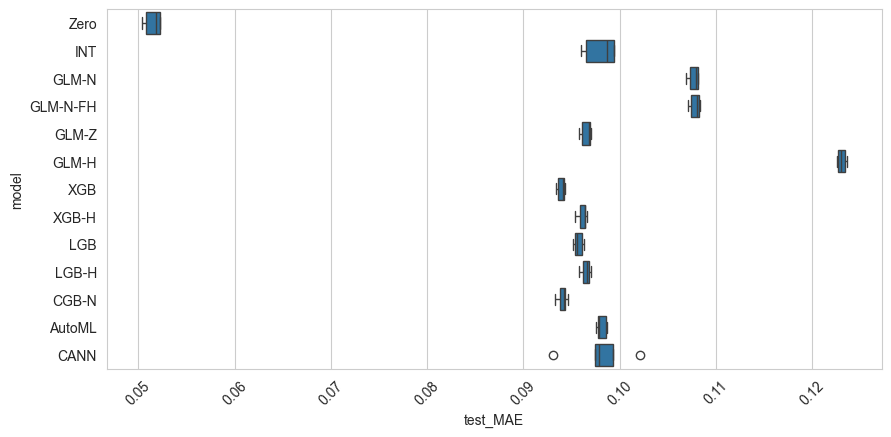

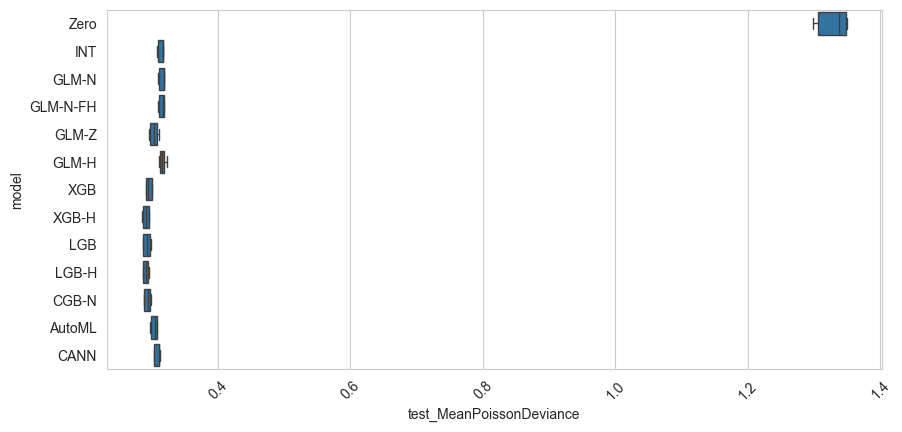

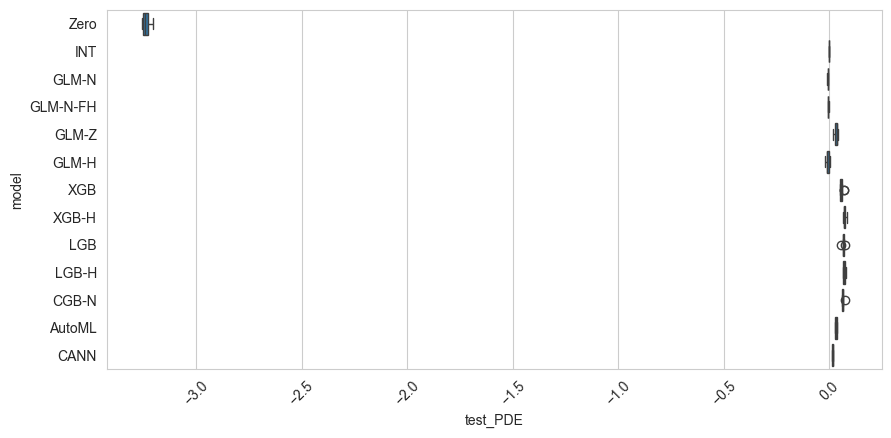

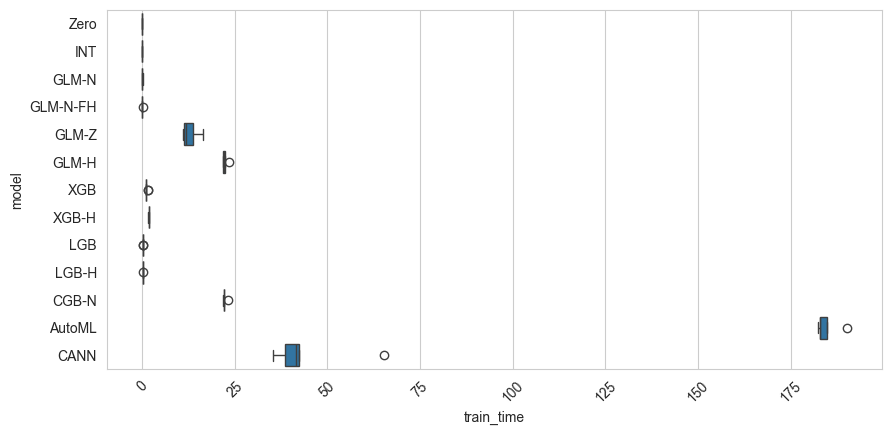

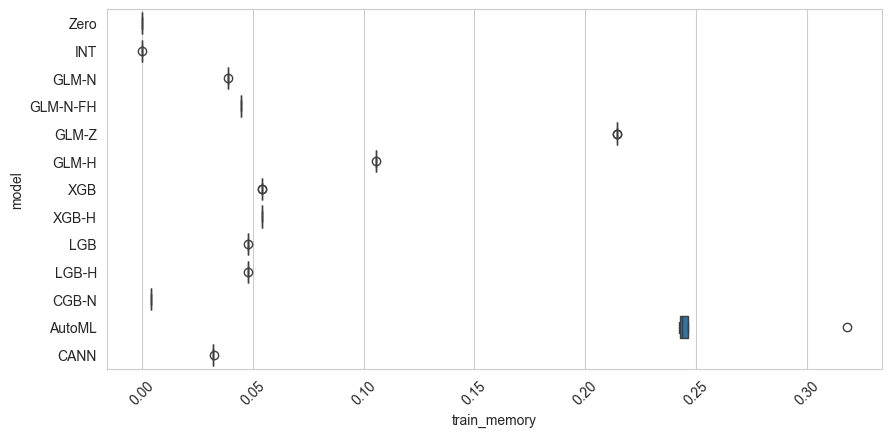

In [19]:
for metric in results[0].keys():
    if metric in ["test_MAE", "test_MeanPoissonDeviance", "test_PDE", "train_time", "train_memory"]:
        plt.figure(figsize=(10, len(results) / 3))
        sns.boxplot(data=df_results, y="model", x=metric)
        plt.xticks(rotation=45)
        plt.show()

Text(0, 0.5, 'test_PDE')

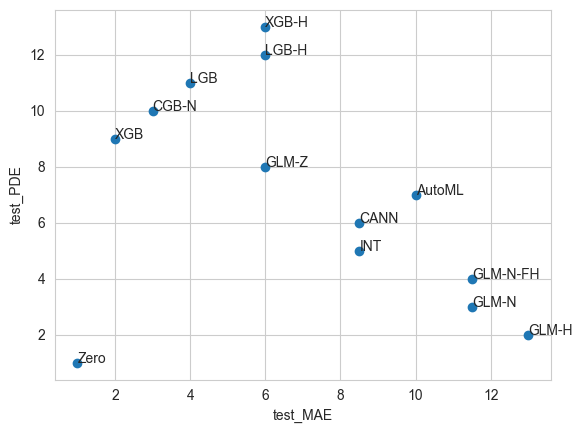

In [20]:
summary = (df_results.groupby("model").mean() * 1000).astype(int).rank()
# summary = df_results.groupby("model").mean()

# droped_index = ["XGB-H-REBAGG"]

# summary = summary.drop(index=droped_index)

x_label = "test_MAE"
y_label = "test_PDE"
import matplotlib.pyplot as plt

x = summary[x_label]
y = summary[y_label]
n = summary.index

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.xlabel(x_label)
plt.ylabel(y_label)

In [21]:
# # 3-D scatter plot using Plotly
# 
# import plotly.express as px
# 
# fig = px.scatter_3d(summary, x=x_label, y=y_label, z="train_time", text=summary.index)
# fig.show()